In [1]:
from utilidades import *
import warnings
warnings.filterwarnings('ignore')

# OPTICS

O algoritmo de clusterização OPTICS (Ordering Points To Identify the Clustering Structure) é um método de aprendizado de máquina não supervisionado que realiza a clusterização de dados baseado na densidade dos pontos. O OPTICS é uma extensão do DBSCAN e pode identificar clusters de diferentes tamanhos e densidades.

Descrição passo a passo de como o algoritmo de clusterização OPTICS funciona:

**1. Escolha de um Ponto Inicial**: O algoritmo inicia selecionando um ponto qualquer do conjunto de dados que ainda não tenha sido visitado.

**2. Exploração da Vizinhança e Construção do Grafo de Alcance**: O algoritmo verifica os pontos vizinhos desse ponto inicial dentro de um determinado raio de vizinhança, similar ao DBSCAN. Ao contrário do DBSCAN, em vez de atribuir os pontos imediatamente a um cluster, o OPTICS cria uma estrutura chamada de grafo de alcance (reachability plot).

**3. Construção do Reachability Plot**: O grafo de alcance é uma representação da densidade dos pontos em relação à distância. Ele armazena informações sobre a densidade dos pontos dentro de uma determinada distância (alcance) a partir do ponto inicial. Essa estrutura é usada para identificar os clusters de diferentes densidades.

**4. Ordenação dos Pontos**: O OPTICS utiliza o grafo de alcance para ordenar os pontos do conjunto de dados. A ordem é baseada em dois fatores: a densidade local (número de pontos dentro do alcance) e a acessibilidade (alcance) aos pontos com densidades maiores. Essa ordenação ajuda a identificar a estrutura de clusterização nos dados.

**5. Extrair Clusters**: A partir da ordenação dos pontos, o algoritmo extrai os clusters identificando os pontos que possuem alcances significativos (representativos de agrupamentos densos). Através dessa informação, o OPTICS também pode identificar os pontos de ruído e outliers.

O algoritmo de clusterização OPTICS é útil em cenários onde os dados possuem clusters de diferentes tamanhos e densidades, pois ele pode adaptar-se a diferentes estruturas de clusterização. Sua capacidade de criar o grafo de alcance e ordenar os pontos baseados em densidade e acessibilidade permite uma análise mais completa da estrutura dos dados. Assim como o DBSCAN, o OPTICS também é eficiente em lidar com pontos de ruído e outliers, contribuindo para a robustez da clusterização.


# Data

In [3]:
X_iris, y_iris, iris_target_names = get_iris_data()
X_wine, y_wine, wine_target_names = get_wine_data()
X_syn_ctrl, y_syn_ctrl, syn_ctrl_target_names = get_synthetic_control_data()

<h1>Redução de dimensionalidade</h1>

In [4]:
from sklearn.manifold import TSNE

X_syn_ctrl_2d = TSNE().fit_transform(X_syn_ctrl)
X_wine_2d = TSNE().fit_transform(X_wine)
X_iris_2d = TSNE().fit_transform(X_iris)

# Clusterização

In [44]:
from sklearn.cluster import OPTICS

op_labels_syn_ctrl = OPTICS(min_samples = 15).fit_predict(X_syn_ctrl)
op_labels_wine = OPTICS(min_samples = 24).fit_predict(X_wine)
op_labels_iris = OPTICS(min_samples = 15).fit_predict(X_iris)

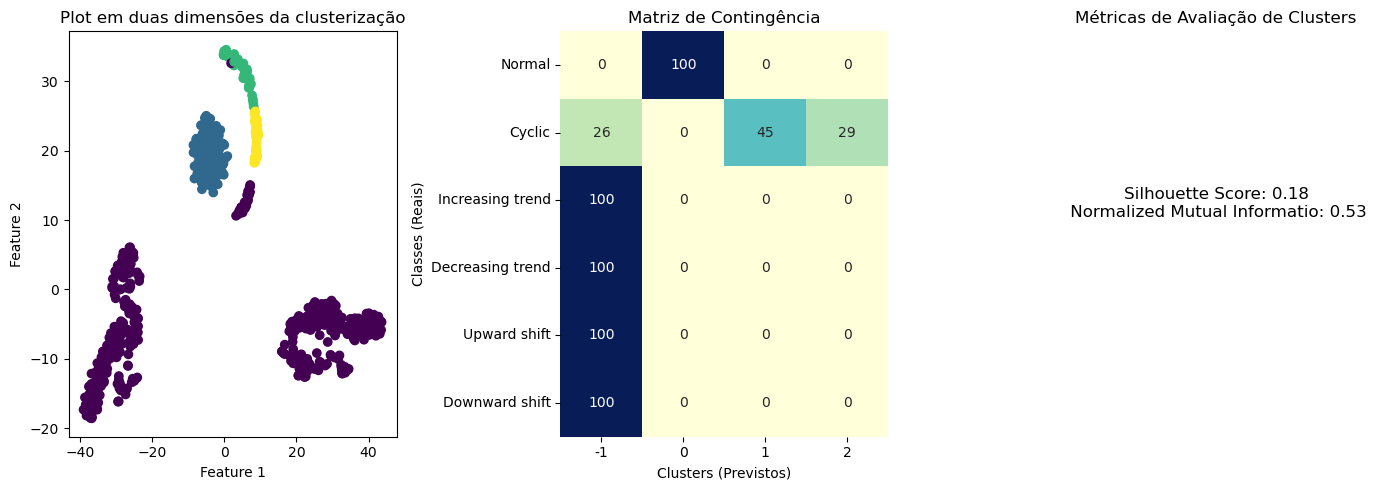

In [45]:
# Synthetic Control

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, op_labels_syn_ctrl, syn_ctrl_target_names)

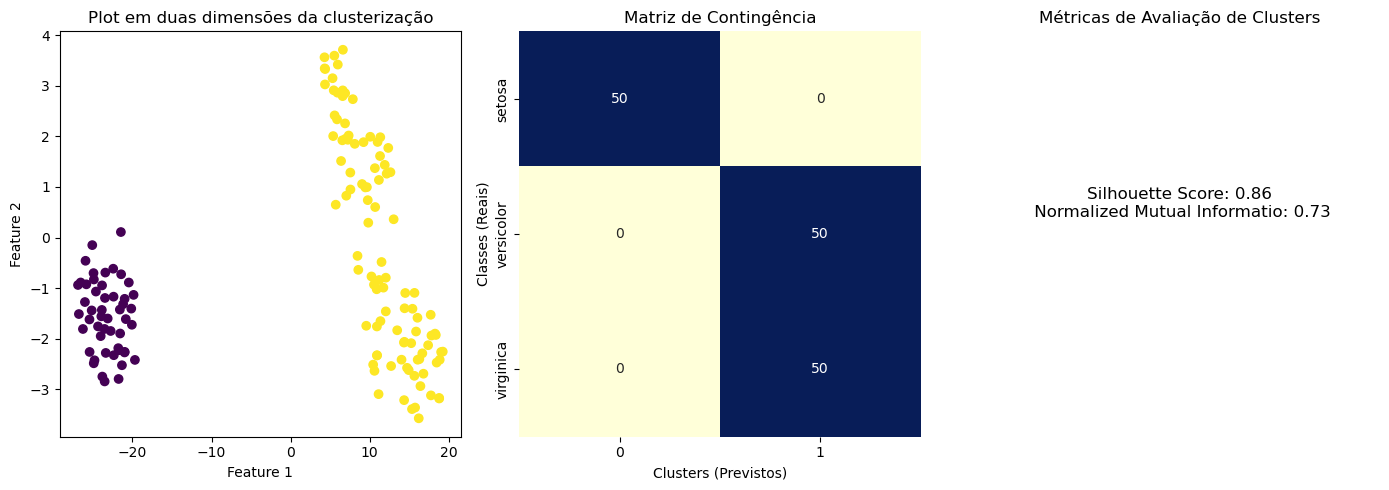

In [46]:
# Iris

plot_cluster_evaluation(X_iris_2d, y_iris, op_labels_iris, iris_target_names)

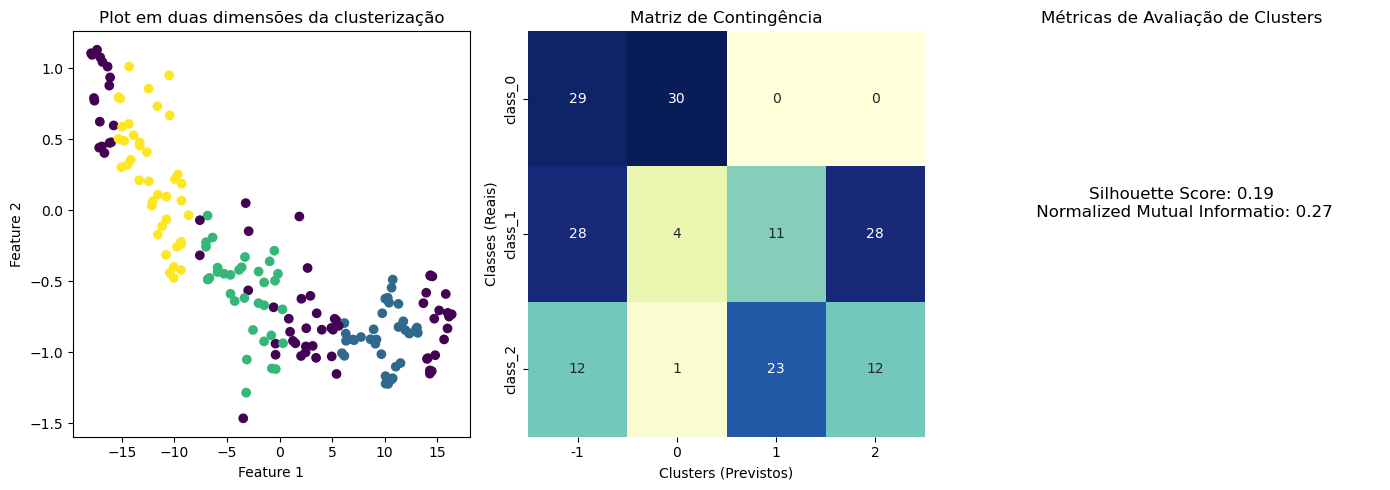

In [47]:
# Wine

plot_cluster_evaluation(X_wine_2d, y_wine, op_labels_wine, wine_target_names)